In [1]:
# ==========================================================
# 01_data_exploration.ipynb
# CIFAR-10  |  Data Loading • Exploration • Preprocessing
# ==========================================================

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# ----------------------------------------------------------
# 1️⃣  Load Dataset
# ----------------------------------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train shape:", x_train.shape, "Labels:", y_train.shape)
print("Test  shape:", x_test.shape,  "Labels:", y_test.shape)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train shape: (50000, 32, 32, 3) Labels: (50000, 1)
Test  shape: (10000, 32, 32, 3) Labels: (10000, 1)


/tmp/ipython-input-2150504430.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


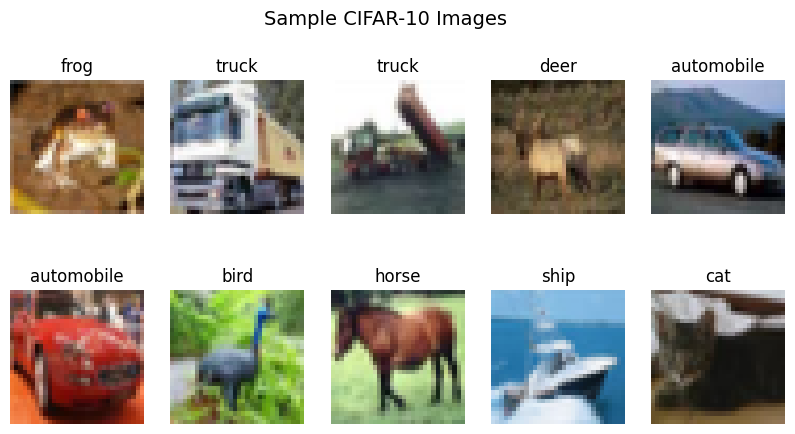

/tmp/ipython-input-2150504430.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=[counts[i] for i in range(num_classes)], palette="crest")


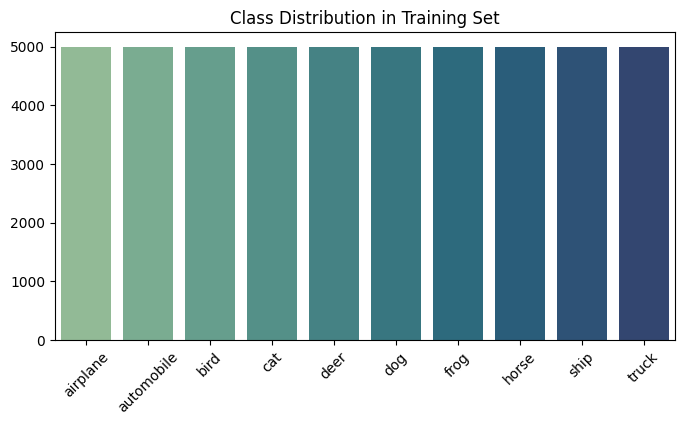

In [2]:
# Display sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")
plt.suptitle("Sample CIFAR-10 Images", fontsize=14)
plt.show()

# Class distribution
counts = Counter(y_train.flatten())
plt.figure(figsize=(8,4))
sns.barplot(x=class_names, y=[counts[i] for i in range(num_classes)], palette="crest")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()


In [3]:
# Merge train+test before stratified re-split
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))

X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (42000, 32, 32, 3), Val: (9000, 32, 32, 3), Test: (9000, 32, 32, 3)


In [4]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0
print("Pixel range:", X_train.min(), "→", X_train.max())


Pixel range: 0.0 → 1.0


In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

batch_size = 64
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
val_gen   = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=False)
test_gen  = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)


In [6]:
print("Training class counts:", Counter(y_train.flatten()))


Training class counts: Counter({np.uint8(4): 4200, np.uint8(2): 4200, np.uint8(5): 4200, np.uint8(7): 4200, np.uint8(8): 4200, np.uint8(0): 4200, np.uint8(1): 4200, np.uint8(3): 4200, np.uint8(6): 4200, np.uint8(9): 4200})


/tmp/ipython-input-3667513878.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(labels[i])])


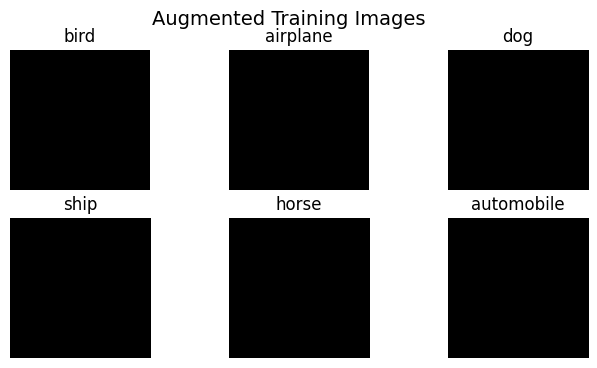

In [7]:
images, labels = next(train_gen)
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.suptitle("Augmented Training Images", fontsize=14)
plt.show()
